In [1]:
# Import required libraries

import numpy as np 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
#Import train data set
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Import test data set
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


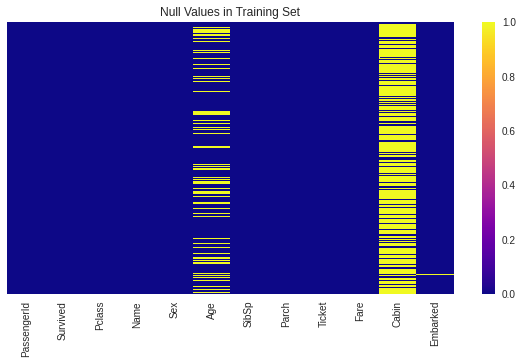

In [4]:
# Find out NaN values  in train dataset
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(train_data.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

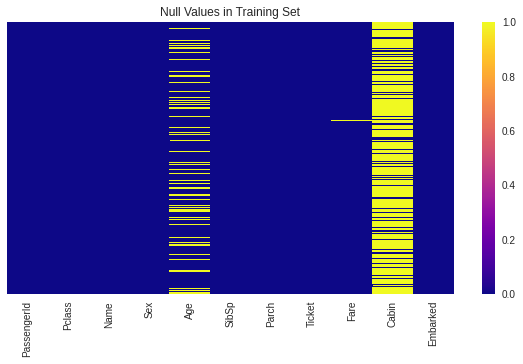

In [5]:
# Find out NaN values in test data
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(test_data.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values in Training Set');

In [6]:
# Replcae NaN values in Fare with median value of data

train_data['Fare']  = train_data.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
test_data['Fare']  = test_data.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))

# Replace NaN values in Embarked column with S (for passengers)
train_data['Embarked'].replace(np.nan, 'S', inplace=True)
test_data['Embarked'].replace(np.nan, 'S', inplace=True)

# Drop the Cabin because of many NaN values as well as low correlation factor
train_data.drop('Cabin',axis=1, inplace=True)
test_data.drop('Cabin',axis=1, inplace=True)

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [7]:
# Replace NaN values in Age with median age of data
#train_data['Age'] = train_data['Age'].fillna(value=train_data['Age'].median())
#Did not work properly!!!
#Lets Fillna with mean of groups by title, i.e. if the title of NaN is Miss the age should be the mean of same title

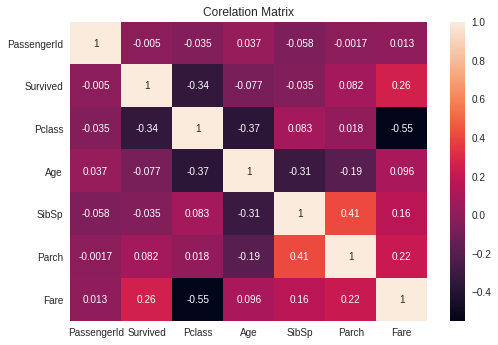

In [8]:
# Heatmap the correlation between different features
sns.heatmap(train_data.corr(), annot=True)
plt.title('Corelation Matrix');

In [9]:
#Extract titles from name column
train_data['Name'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test_data['Name'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

#Compare the titles in train and test data
print(train_data['Name'].unique())
print(test_data['Name'].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


As it can be seen by comparing the values in train_data and test_data, there are many titles in train_data and I want to make a new column named as Repsectable to increase the accurcay of the model. Therefore, the column value is 1 if the title is Dr, Rev, Capt., Col., Don. Or Lady. Otherwise 2 is assigned.

In [10]:
def Respectable_column_maker(x):
    if (x['Name']=='Dr') or (x['Name']=='Rev') or (x['Name']=='Capt') or (x['Name']=='Don') or (x['Name']=='Dona') or (x['Name']=='Lady'):
        return 1
    else:
        return 2

train_data = train_data.assign(Respectable=train_data.apply(Respectable_column_maker, axis=1))  
test_data = test_data.assign(Respectable=test_data.apply(Respectable_column_maker, axis=1))
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Respectable
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,S,2


In [11]:
#Replace the columns that exist in train but not the test dataset
train_data.rename(columns={'Name' : 'Title'}, inplace=True)
train_data['Title'] = train_data['Title'].replace([ 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don', 'Dr', 'Rev', 'Ms','Col'], 'Other')
                                      
test_data.rename(columns={'Name' : 'Title'}, inplace=True)
test_data['Title'] = test_data['Title'].replace([ 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don', 'Dr', 'Rev','Ms','Col'], 'Other') 

In [12]:
#Fill in the NaN values as described above
train_data["Age"] = train_data.groupby("Title").transform(lambda x: x.fillna(x.mean()))
test_data["Age"] = test_data.groupby("Title").transform(lambda x: x.fillna(x.mean()))

#test_data.loc[test_data.Age.isnull(), 'Age'] = test_data.groupby("Name").Age.transform('mode')

In [13]:
#Check to see if there is any NaN left
train_data[pd.isnull(train_data).any(axis=1)]

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Respectable


The policy of Women Children First (WCF) is used by the crew members giving women and children survival advantage over men. Based on this social norm some new attributes have been introduced (Children and Mother) to strengthen the dataset and improve the analysis.
If the title contains Mrs and Parch value is greater than 0, then the mother is 1, otherwise it is 2.
Similarly, Children column value is 1 only if age is less than or equal to 14, otherwise, 2 is assigned.

In [14]:
def Mother_column_maker(x):
    if (x['Title']=='Mrs') and (x['Parch']>0):
        return 1
    else:
        return 2

def Children_column_maker(x):
    if (x['Age']<=14):
        return 1
    else:
        return 2
    
train_data = train_data.assign(Mother=train_data.apply(Mother_column_maker, axis=1))  
test_data = test_data.assign(Mother=test_data.apply(Mother_column_maker, axis=1))

train_data = train_data.assign(Children=train_data.apply(Children_column_maker, axis=1))  
test_data = test_data.assign(Children=test_data.apply(Children_column_maker, axis=1))

train_data.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Respectable,Mother,Children
0,1,0,3,Mr,male,1.0,1,0,A/5 21171,7.2500,S,2,2,1
1,2,1,1,Mrs,female,2.0,1,0,PC 17599,71.2833,C,2,2,1
2,3,1,3,Miss,female,3.0,0,0,STON/O2. 3101282,7.9250,S,2,2,1
3,4,1,1,Mrs,female,4.0,1,0,113803,53.1000,S,2,2,1
4,5,0,3,Mr,male,5.0,0,0,373450,8.0500,S,2,2,1


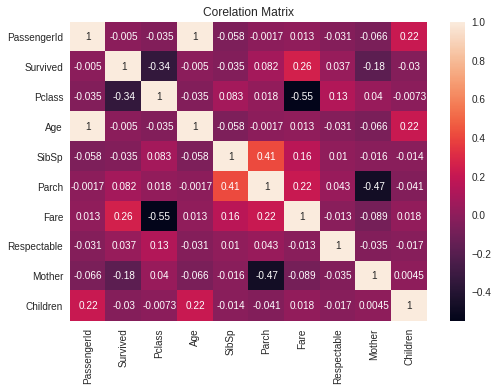

In [15]:
sns.heatmap(train_data.corr(), annot=True)
plt.title('Corelation Matrix');

In [16]:
#Normalize Fare
cols_to_norm = ['Fare']
train_data[cols_to_norm] = train_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test_data[cols_to_norm] = test_data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
train_data


,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Respectable,Mother,Children
0,1,0,3,Mr,male,1.0,1,0,A/5 21171,0.014151,S,2,2,1
1,2,1,1,Mrs,female,2.0,1,0,PC 17599,0.139136,C,2,2,1
2,3,1,3,Miss,female,3.0,0,0,STON/O2. 3101282,0.015469,S,2,2,1
3,4,1,1,Mrs,female,4.0,1,0,113803,0.103644,S,2,2,1
4,5,0,3,Mr,male,5.0,0,0,373450,0.015713,S,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Other,male,887.0,0,0,211536,0.025374,S,1,2,2
887,888,1,1,Miss,female,888.0,0,0,112053,0.058556,S,2,2,2
888,889,0,3,Miss,female,889.0,1,2,W./C. 6607,0.045771,S,2,2,2
889,890,1,1,Mr,male,890.0,0,0,111369,0.058556,C,2,2,2


In [17]:
def Sex_column_maker(x):
    if (x['Sex']=='male'):
        return 1
    else:
        return 2

train_data = train_data.assign(Sex=train_data.apply(Sex_column_maker, axis=1))  
test_data = test_data.assign(Sex=test_data.apply(Sex_column_maker, axis=1))
train_data.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Respectable,Mother,Children
0,1,0,3,Mr,1,1.0,1,0,A/5 21171,0.014151,S,2,2,1
1,2,1,1,Mrs,2,2.0,1,0,PC 17599,0.139136,C,2,2,1
2,3,1,3,Miss,2,3.0,0,0,STON/O2. 3101282,0.015469,S,2,2,1
3,4,1,1,Mrs,2,4.0,1,0,113803,0.103644,S,2,2,1
4,5,0,3,Mr,1,5.0,0,0,373450,0.015713,S,2,2,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Mother", "Children", "Respectable"]
X = train_data[features]
X_test = test_data[features]

model = RandomForestClassifier(random_state = 1, max_depth = 5,  n_estimators = 100)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")